In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape)

170498071/170498071 [==============================] - 67s 0us/step
(50000, 32, 32, 3)


In [3]:
# Normalize: 0,255 -> 0,1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

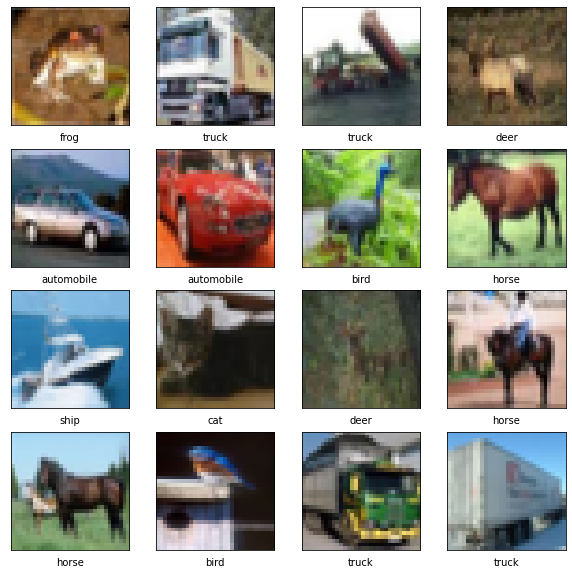

In [4]:
def show():
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays,
        # which is why you need the extra index
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

show()

In [6]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [11]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

model.compile(optimizer, loss, metrics)

batch_size = 64
epochs = 10
model.fit(train_images, train_labels, batch_size, epochs, verbose=1)

Epoch 1/10
782/782 [==============================] - 24s 30ms/step - loss: 1.5519 - accuracy: 0.4387
Epoch 2/10
782/782 [==============================] - 22s 29ms/step - loss: 1.2284 - accuracy: 0.5655
Epoch 3/10
782/782 [==============================] - 24s 31ms/step - loss: 1.1043 - accuracy: 0.6125
Epoch 4/10
782/782 [==============================] - 27s 34ms/step - loss: 1.0245 - accuracy: 0.6420
Epoch 5/10
782/782 [==============================] - 27s 34ms/step - loss: 0.9687 - accuracy: 0.6623
Epoch 6/10
782/782 [==============================] - 26s 33ms/step - loss: 0.9218 - accuracy: 0.6793
Epoch 7/10
782/782 [==============================] - 25s 32ms/step - loss: 0.8870 - accuracy: 0.6910
Epoch 8/10
782/782 [==============================] - 25s 32ms/step - loss: 0.8492 - accuracy: 0.7057
Epoch 9/10
782/782 [==============================] - 25s 32ms/step - loss: 0.8150 - accuracy: 0.7169
Epoch 10/10
782/782 [==============================] - 25s 32ms/step - loss: 0.787

In [ ]:
batch_size = 64
epochs = 10
model.fit(train_images, train_labels, batch_size, epochs, verbose=1)

In [12]:
model.evaluate(test_images, test_labels, batch_size, verbose=2)

157/157 - 1s - loss: 0.9564 - accuracy: 0.6743 - 1s/epoch - 7ms/step


[0.9564468860626221, 0.6743000149726868]